<a href="https://colab.research.google.com/github/akitim/SkillFactory_projects/blob/main/Akimkin_Timofey_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_4_%D0%90%D0%B2%D0%B8%D0%B0%D1%80%D0%B5%D0%B9%D1%81%D1%8B_%D0%B1%D0%B5%D0%B7_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка библиотек

In [61]:
import pandas as pd
from datetime import datetime as dat
#import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings; warnings.filterwarnings('ignore') #(action='once')
# import missingno as msno
# from itertools import combinations
# from scipy.stats import ttest_ind
# from scipy.stats import norm
 
%matplotlib inline
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
pd.options.display.precision = 2
# pd.options.display.float_format = '{:.2f}'.format

#Загрузка датасета

In [81]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/Project_4%20-%20Loseless%20flights.csv'
data = pd.read_csv(path)

data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']] =\
    data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']].\
        apply(lambda se: se.apply(lambda x: '%.0f' % x), axis=1)
        
data.scheduled_departure = data.scheduled_departure.apply(lambda t: dat.strptime(t, '%Y-%m-%dT%H:%M:%SZ'))

data.sample(5)

,flight_id,departure_city,arrival_city,scheduled_departure,flight_duration_in_hr,flight_distance,avg_speed,aircraft_model,seats_in_a_plane,seats_sold,gain_per_flight,income_per_flight_eval1,income_per_flight_eval2
35,136345,Анапа,Москва,2017-01-24 10:05:00,1.67,1208,725,Boeing 737-300,130,108,1517600,1377050,1351860
8,136159,Анапа,Москва,2017-01-04 10:05:00,1.63,1208,740,Boeing 737-300,130,115,1700600,1550940,1538175
121,136927,Анапа,Белгород,2017-01-22 09:25:00,0.85,636,748,Sukhoi Superjet-100,97,97,765300,716732,698382
42,136389,Анапа,Москва,2017-01-18 10:05:00,1.67,1208,725,Boeing 737-300,130,129,1873800,1705921,1708060
126,136956,Анапа,Белгород,2017-02-04 09:25:00,0.83,636,763,Sukhoi Superjet-100,97,96,746400,700516,683774


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   flight_id                127 non-null    int64         
 1   departure_city           127 non-null    object        
 2   arrival_city             127 non-null    object        
 3   scheduled_departure      127 non-null    datetime64[ns]
 4   flight_duration_in_hr    127 non-null    float64       
 5   flight_distance          127 non-null    int64         
 6   avg_speed                127 non-null    object        
 7   aircraft_model           127 non-null    object        
 8   seats_in_a_plane         127 non-null    int64         
 9   seats_sold               127 non-null    int64         
 10  gain_per_flight          127 non-null    object        
 11  income_per_flight_eval1  127 non-null    object        
 12  income_per_flight_eval2  127 non-nul

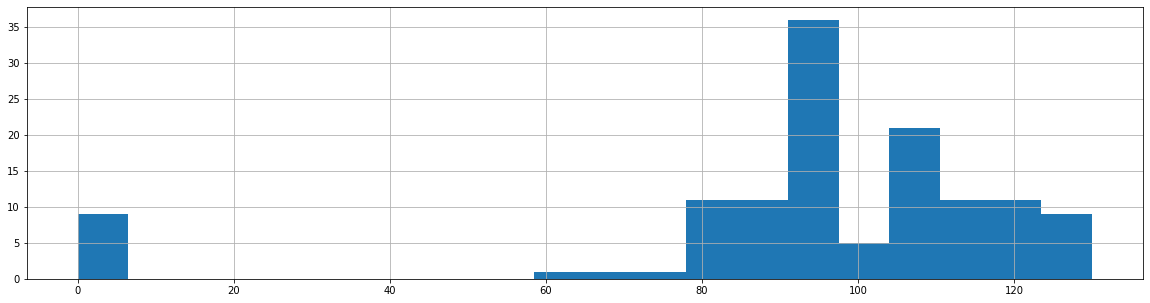

In [82]:
plt.figure(figsize = (20, 5))
data.seats_sold.hist(bins=20);

###рейсы в Новокузнецк не относятся к отменненым, однако данных по количеству купленных билетов и соответственно по прибыли нет

In [89]:
data[(data.seats_sold != 0) & (data.arrival_city == 'Новокузнецк')].shape

(0, 13)